In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
# import dependencies
import nltk
#nltk.download('all') # Uncomment this and run

import re,gensim,spacy

# start downloading the data we are gonna be using today.
# Look up the Enron scandal: https://en.wikipedia.org/wiki/Enron_scandal
# Find details about the dataset here: https://www.cs.cmu.edu/~./enron/
# and here https://data.world/brianray/enron-email-dataset
import pandas as pd
#enron_link ='https://query.data.world/s/boypyv5j5ey55s3mgevys7hbz3halo' 
#enron_df = pd.read_csv(enron_link)
#enron_df.to_csv('enron_data.csv',index=False) 
enron_df = pd.read_csv('enron_data.csv')
enron_df = enron_df[enron_df.content.apply(type)==str] # filter non strings
enron_categories = []
for cat in range(1,13):
    for level in range(1,3):
        category = 'Cat_%d_level_%d'%(cat,level)
        if category in enron_df.columns:
            enron_categories.append(category)
enron_df = enron_df[[col for col in enron_df.columns if not col in enron_categories and 'weight' not in col]]
# pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git
# For an implementation of the stanford corenlp, uncomment this: import lucem_illud 
import lucem_illud
lucem_illud.setupStanfordNLP()
import lucem_illud.stanford as stanford

# <center> Corruption, Money and Power <center> 
![](http://media.economist.com/sites/default/files/cf_images/GA/2002w04/CGA229.gif)
![](http://i.dailymail.co.uk/i/pix/2011/12/08/article-2071852-0F1BE2BF00000578-966_468x383.jpg)

**<center>Text as Data</center>**
***<center>Information Extraction, Exploration and Prototyping</center>***

<center>Snorre Ralund</center>

![](http://3.bp.blogspot.com/-H5EfLEMD7gs/VU0R6T0cR5I/AAAAAAAABeA/3tTzaqPYdRw/s1600/desmazieres-borges-library-of-babel.jpg)

Information about what people do, think, and feel lies embedded in text. Much of our social activity and communication is now done natively via text. The internet is full of information stored in text, and textual traces range from social media, emails and instant messaging, to automatically transcribed videos from youtube or memos from doctors, goverment records and digitized libraries. 

This vast supply of text has broad demand for natural language processing and machine learning tools to filter, search, and translate text into valuable data.

And it has broad exciting opportunities for social scientists who knows how to get and handle text as data.

** Examples **
* Chen 2013: *"The effects of language on Economic Behaviour - Evidence from Savings Rates, Health Behaviors, and Retirement Assets"*
    * Quantifying the use of future tense in different languages and its connection to future oriented behavior: saving for retirement, practicing safe sex etc.
* Gentzkow and Shapiro 2007: *"What drives media slant? Evidence from U.S daily newspapers"*

*  Danescu-Niculescu-M et. al 20xx [*"Echoes of Power: Language Effects and Power Differences in Social Interaction"*](https://www.cs.cornell.edu/%7Ecristian/Echoes_of_power_files/echoes_of_power.pdf)

**Agenda**

Today I want you to get your hands dirty with manipulating and handling text in python.

Before we start creating our own custom models to process text, I want you to get a good feeling with the off-the-shelf-tools available as well as basic processing of text you can do with python.

We are gonna focus on **Information Extraction**

and **Exploration**.


This means developing the skills to do efficient exploratory analysis of text. 

While the generic tools I will be presenting are very powerful, it is however important from a scientific perspective, to stress that they serve mainly in the initial phase, as **Protyping** results.

This is great, and for many purposes enough, but the next to sessions we shall focus on creating custom and more ***transparent*** and ***reliable*** models process text data.


** Headlines **
* Text normalization, and representation.
* Information extraction
    * String Pattern extraction with regular expressions.
    * Lexical methods.
    * Model based information extraction.
* Sentiment analysis
* Part-of-tagging, named-entity-recognition.
* Document Clustering

# String operations with python

of course you already now your basics:

`string.split
string.strip
string.replace`

And sometimes this will be enough, but sometimes it is not.

# Regular Expressions
![](https://cdn-images-1.medium.com/max/800/0*j1f-EFL7TDtf6K0o.jpg)

Regex can be a little terrifying:

`pattern = '(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*:(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)(?:,\s*(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*))*)?;\s*)'`


It is extremely valuable when working with any kind of text, for searching, extracting and substituting specific patterns.

## Example
Lets imagine we were hackers trying to break into computers in our network. 

First we would need a way to search for the possible machines. 
Regular expressions to the rescue...

In [2]:
import os
ip_lookup = os.popen('arp -a').read()
ip_lookup

'ant-2y5tlh2.samf.domain (192.38.122.169) at a4:4c:c8:ee:7e:06 [ether] on eno1\n? (192.38.122.1) at 00:1f:ca:f8:2b:c9 [ether] on eno1\n? (192.38.122.232) at 68:5b:35:a9:2c:d7 [ether] on eno1\n? (192.38.122.97) at 68:5b:35:a9:2c:d7 [ether] on eno1\n? (192.38.122.151) at 00:23:24:7c:93:ea [ether] on eno1\n'

In [3]:
import re
#mac_add = '(([0-9a-f]{2}\:){5}[0-9a-f]{2})'
#macs = [i[0] for i in re.findall(mac_add,ip_lookup)]
mac_add = '([a-f0-9\:]{17})'
macs = re.findall(mac_add,ip_lookup)

ip_pattern = '([0-9\.]{9,})'
ips = re.findall(ip_pattern,ip_lookup)
list(zip(macs,ips))


[('a4:4c:c8:ee:7e:06', '192.38.122.169'),
 ('00:1f:ca:f8:2b:c9', '192.38.122.1'),
 ('68:5b:35:a9:2c:d7', '192.38.122.232'),
 ('68:5b:35:a9:2c:d7', '192.38.122.97'),
 ('00:23:24:7c:93:ea', '192.38.122.151')]

** Regular Expression syntax **

Ressources:

Play around with it [here](http://regexr.com/) or in this notebook.

Lookup all special characters [here](https://www.regular-expressions.info/refquick.html)

* \+ = 1 or more times
* \* = 0 or more times
* {3} = exactly three times
* ? = once or none
* (?=)	= Positive lookahead
* (?!)	= Negative lookahead
* (?<=)	= Positive lookbehind
* (?<!) = Negative lookbehind
* \\ = escape character, used to find characters that has special meaning with regex: e.g. \+ \*
* () = defining a the match group: i.e. within the paranthesis is the pattern I care about.
* [] = set of characters
* ^ = applied within a set, it becomes the inverse of the set defined.
* . = any characters except line break
* | = or statement. p|b find characters a or b.
* \d = digits
* \D = any-non-digits.
* \s = whitespace-separator

## Regular expressions (2): define - inspect - refine

In [4]:
def explore_regex(pattern,string_sample,n_output=10,before=10,after=10,shuffle=False):
    count = 0
    import random
    length = len(string_sample)
    
    results = list(enumerate(re.finditer(pattern,string_sample)))
    
    if shuffle:
        random.shuffle(results)
    indices,results = zip(*results)
    for result in results:
        start,stop = result.span()
        temp_after = min([length-stop,after])
        temp_before = min([start,before])
        print('Matched: %s\tContext:%s'%(result.group(),string_sample[start-temp_before:stop+temp_after]))
        count+=1
        if count>n_output:
            break
    return [result.group() for result in results]

### email example

In [5]:
# First lets look at a sample
sample_string = '\n'.join(enron_df.sample(50).content) # the sample function is very nice for your workflow.
sample_string[0:1000]

"Thanks for the info. I appreciated the call the other day. It really helps me out to recieve info early like that. D From: Mary Jo Johnson 11/20/2000 03:38 PM To: Daren J Farmer/HOU/ECT@ECT, James McKay/HOU/ECT@ECT, Gary A Hanks/HOU/ECT@ECT cc: Jill T Zivley/HOU/ECT@ECT Subject: HILCORP old ocean volume According to Gary Hanks, we would like to have the gas on the valley line anyway ---------------------- Forwarded by Mary Jo Johnson/HOU/ECT on 11/20/2000 03:26 PM --------------------------- To: Jill T Zivley/HOU/ECT@ECT cc: Edward D Gottlob/HOU/ECT@ECT, Lauri A Allen/HOU/ECT@ECT Subject: Re: Producer service group? I can not believe you are sending emails form Hawaii!!!! You are crazy. I took care of Camden for the month- It is now 330 and Hilcorp has not responded. I spoke with Jerry Bubert several times today- emailed Mike LAnnou and left messages, and had him paged, and copied Hildebrand (the president). If we don't hear by 4pm, we are supposed to bypass the gas...........\nGuys: 

In [6]:
sample_string = '\n'.join(enron_df.sample(50).content)
email_pattern = '@' # start defining a very broad one
email_pattern = '[^\s]+@[^\s]+' # narrow it a little..  \S = [^\s]
results1 = explore_regex(email_pattern,sample_string) 
email_pattern2 = '[0-9A-Za-z_\.\-]+@[\.0-9A-Za-z]+' # refine
print('\nNew Pattern: %s'%email_pattern2)
results2 = explore_regex(email_pattern2,sample_string)
list(set(results1)-set(results2))[0:10] # inspect divergence

Matched: <lgoldseth@svmg.org>	Context:Goldseth" <lgoldseth@svmg.org> 04/26/200
Matched: <lgoldseth@svmg.org>	Context:11 PM To: <lgoldseth@svmg.org> cc: Subje
Matched: mcausholli@hotmail.com	Context: 807-1039 mcausholli@hotmail.com (preferre
Matched: Causey/Corp/Enron@ENRON,	Context:: Richard Causey/Corp/Enron@ENRON, Sally Bec
Matched: Beck/HOU/ECT@ECT	Context:ON, Sally Beck/HOU/ECT@ECT cc: Subje
Matched: Beck/HOU/ECT@ECT,	Context:To: Sally Beck/HOU/ECT@ECT, Richard C
Matched: Causey/Corp/Enron@ENRON,	Context:, Richard Causey/Corp/Enron@ENRON, Gene Hump
Matched: Humphrey/Enron@EnronXGate,	Context:RON, Gene Humphrey/Enron@EnronXGate, Wanda Cur
Matched: Curry/HOU/EES@EES,	Context:te, Wanda Curry/HOU/EES@EES, Brent A P
Matched: Price/Enron@EnronXGate,	Context:, Brent A Price/Enron@EnronXGate, Charlene 
Matched: Jackson/Corp/Enron@ENRON,	Context: Charlene Jackson/Corp/Enron@ENRON, Christie 

New Pattern: [0-9A-Za-z_\.\-]+@[\.0-9A-Za-z]+
Matched: lgoldseth@svmg.org	Context:oldseth" <lgoldset

['Beck/HOU/ECT@ECT',
 'Kingerski/NA/Enron@Enron,',
 'Lowry/HOU/ECT@ECT,',
 'mailto:abb@eslawfirm.com',
 'Woods/DUB/EES@EES,',
 'Shapiro/NA/Enron@ENRON,',
 'Bowen/HOU/ECT@ECT',
 'Thompson/HOU/ECT@ECT,',
 'McMahon/HOU/ECT@ECT,',
 'Benevides/HOU/EES@EES,']

In [ ]:
RE_EMAIL = '[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'#'[\b<][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[\b>]'

** Exercises **

***Ex. 1.1***
* Load the Enron email dataset and start mining numbers mentioned in the emails.
    * Both literal numbers (millions,billions etc) and digits.
    * Match currencies $ and percentages %
* Rank the people talking most about numbers.

***Ex. 1.2***
* Find names mentioned in the emails. - i.e. marked by Capital letters that did not follow punctuation and newlines.
    * This is a really hard task, so don't worry that it won't be perfect, it is just to get a feel of the task of extracting Entities from text.
* Which names are mentioned the most, and which people talk most about who?



In [ ]:
# Your answer goes here or in the exercise notebook.

# From raw text to words and numbers
## ... fortunatly we don't have to write everything in regex ourselves.

** Preprocessing **
* Word tokenization and sentence detection
    * the need can vary alot (social media, to old prose, and ocr based goverment documents.)
* Ngram / skipgram / Collocations
* Stemming / Lemmatization
* Stopword remowal.


**Tokenizer**

In [7]:
# Lets get some real native text.
import requests
qs = ['math','hard','sucks','ass','text','data','bitch']
q = 'http://deepbeat.org/deepbeat.fcgi?l=en&nn=true&k=&m=multi'+'&q='.join(qs) # found using the network monitor.
#original = 'http://deepbeat.org/deepbeat.fcgi?l=en&nn=true&k=&m=multi&q=math&q=sucks&q=&q=&q=&q=&q=&q=&q='
lyrics = requests.get(q).json()

In [8]:
rhymes = '\n'.join([i['line'] for i in lyrics['rhymes']])
print(rhymes)

Hey Ja Joey
Legally and illegally
Trouble comes naturally
'' Bridge ''
Uh really. Totally.
Blood start flowing
It's so lonelly
Man I need Maui Wowie
See cause usually
Just like a hillbilly
I will literally
I smoke that Maui Wowie
Snatch the gat brr-at! And lyrically wreck that ass officially
I need Maui Wowie
And bullshit usually
I know you especially
And acting unrationally
I'll get my swagger goin'
They want me chronally
Breakfast at Papa Deaux's


In [9]:
#rhymes.split()
#nltk.word_tokenize(rhymes)
#nltk.sent_tokenize(rhymes)


so it can parse tough rap lyrics. But what about **emotions**?

In [10]:
# practice emojiis here https://regexr.com/3a8o5
import re
pattern = '\:\)|\:\(|<3|\:\/(?!\/)|\:-\/|\:\||\:p(?![a-z])|\:\-\)' # see nltk.sentiment.util.EMOTICON_RE for a more professional implementation
emoticon_string = ''':p - that should match!
no matches here: http://example.com
* We don\'t watch to match inside other :pencil: emoji syntax either
* Probably shouldn\'t match this `for (var i=0; i<3; i++){}`
* This should match - I love (<3) Regular Expressions!
* some code shouldn\'t match: `<tag:person />`
:) SO HAPPY


===========================
All emoticons listed out.
these should always match!
:) :( <3 :/ :-/ :| :p
==========================='''
re.findall(pattern,emoticon_string)

[':p', '<3', '<3', ':)', ':)', ':(', '<3', ':/', ':-/', ':|', ':p']

In [11]:
#nltk.word_tokenize(emoticon_string)

In [12]:
# Implementation in a tokenizer here:
nltk.sentiment.vader.SentiText(emoticon_string).words_and_emoticons
# If that doesn't work look at Bjarke Felbos work DeepMoji: https://github.com/bfelbo/DeepMoji/blob/master/deepmoji/tokenizer.py

In [ ]:
%timeit emotion_string.split()
%timeit nltk.word_tokenize(emotion_string)
%timeit nltk.sentiment.vader.SentiText(emoticon_string).words_and_emoticons

## Preprocessing(2)
Stemming, lemmatizing, stopwords, and non-digit words.

In [13]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english')) # remember to define as set for performance
stop_words_list = stopwords.words('english')
own_stop_words = set(["the","it","she","he", "a","trump",'idiot','failure','weak']) # Define your own list of stopwords

%timeit [w for w in own_stop_words if w not in stop_words_list]
%timeit [w for w in own_stop_words if w not in stop_words_nltk]
%timeit own_stop_words&stop_words_nltk

100000 loops, best of 3: 13.5 µs per loop
The slowest run took 6.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 661 ns per loop
The slowest run took 7.20 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 287 ns per loop


In [14]:
#The stemmers and lemmers need to be initialized before being run
porter = nltk.stem.porter.PorterStemmer() # 
snowball = nltk.stem.snowball.SnowballStemmer('english') # a greedy stripper
wordnet = nltk.stem.WordNetLemmatizer()
def normalize_tokens(tokens,lowercase=False
                     ,remove_non_alpha=False
                     , stopwords = False
                     , stemmer = False
                     , lemmer = False):
    #We can use a generator here as we just need to iterate over it
    workingIter = tokens
    #removing non-words
    if remove_non_alpha:
        workingIter = (w for w in workingIter if w.isalpha())
    
    # lowering
    if lowercase:
        workingIter = (w.lower() for w in workingIter)
    #Now we can use the semmer, if provided
    if stemmer:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwords:
        workingIter = (w for w in workingIter if w not in stopwords)
    #We will return a list with the stopwords removed
    return list(workingIter)
'state-of-the-art'.isalpha()

Lets apply this to our email dataset.

In [16]:
kwargs = {'lowercase':True
        ,'remove_non_alpha':True,
        'stopwords':stop_words_nltk,
        'stemmer':False,'lemmer':wordnet}
enron_df.iloc[0:10].content.apply(nltk.word_tokenize).apply(normalize_tokens
                                                            ,**kwargs)#.apply(len)#apply(lambda x: len(set(x)))

0                                           [forecast]
1    [traveling, business, meeting, take, fun, trip...
2                          [test, successful, way, go]
3    [randy, send, schedule, salary, level, everyon...
4                                [let, shoot, tuesday]
5     [greg, either, next, tuesday, thursday, phillip]
6    [please, cc, following, distribution, list, up...
7                                            [morning]
8    [login, pallen, pw, think, required, isp, stat...
9    [forwarded, phillip, k, pm, buckner, buck, pm,...
Name: content, dtype: object

## Ngrams / SkipGrams and Collocations

In [20]:
from collections import Counter
#string_sample = ' '.join(enron_df.sample(100).content)
sequence = string_sample # rhymes
n = 1
unigrams = Counter([sequence[i:i+n] for i in range(len(sequence)-n)])
print('Unigrams')
print(unigrams.most_common(20))
n = 2 
bigrams = Counter([sequence[i:i+n] for i in range(len(sequence)-n)])
print('\nBIGRAMS:')
print(bigrams.most_common(10))
n = 3
trigrams = Counter([sequence[i:i+n] for i in range(len(sequence)-n)])
print('\nTrigrams:')
print(trigrams.most_common(10))

Unigrams
[(' ', 62088), ('e', 35372), ('t', 25295), ('a', 24125), ('o', 21971), ('i', 20612), ('n', 20013), ('r', 19237), ('s', 18994), ('l', 12813), ('h', 11274), ('d', 10159), ('c', 9812), ('u', 7774), ('m', 7409), ('p', 6440), ('g', 6232), ('f', 5759), ('y', 5398), ('0', 5372)]

BIGRAMS:
[('e ', 9130), (' t', 7373), ('s ', 6495), ('th', 5810), ('er', 5347), ('he', 5156), (' a', 4857), ('t ', 4627), ('in', 4621), ('d ', 4488)]

Trigrams:
[(' th', 4731), ('the', 3777), ('20 ', 3516), ('he ', 3496), ('=20', 3489), ('ed ', 1857), (' to', 1819), ('ing', 1791), ('to ', 1618), ('er ', 1582)]


In [27]:
# With sligth modification we can change it to do Word-based ngrams + skip.
skip = 4 
n = 4
sequence = ''.join([i.lower() for i in ' '.join(enron_df.sample(100).content) if i.isalpha()])
sequence = [i for i in normalize_tokens(nltk.word_tokenize(' '.join(enron_df.sample(100).content))) if i.isalpha()]
bigrams = Counter(map(tuple,[[sequence[i]]+['-']*(skip-1)+sequence[i+skip:i+skip+n] for i in range(len(sequence[::skip])-(n+skip))]))
print('\nSkipgram:')
print(bigrams.most_common(10))



Skipgram:
[(('Subject', '-', '-', '-', 'Analyst', 'program', 'needs', 'you'), 3), (('By', '-', '-', '-', 'Daily', 'News', 'Published', 'January'), 3), (('Jeff', '-', '-', '-', 'great', 'idea', 'Thanks', 'for'), 2), (('Sue', '-', '-', '-', 'Fax', 'Forwarded', 'by', 'Susan'), 2), (('Mara', '-', '-', '-', 'Forwarded', 'by', 'Susan', 'J'), 2), (('Enron', '-', '-', '-', 'by', 'Susan', 'J', 'on'), 2), (('Tel', '-', '-', '-', 'Susan', 'J', 'on', 'AM'), 2), (('Forwarded', '-', '-', '-', 'AM', 'From', 'Althea', 'Gordon'), 2), (('by', '-', '-', '-', 'From', 'Althea', 'Gordon', 'AM'), 2), (('cc', '-', '-', '-', 'and', 'Analyst', 'program', 'needs'), 2)]


In [22]:
def find_ngrams(sentence, n):
    return Counter(zip(*[sentence[i:] for i in range(n)]))
def find_ngrams2(sentence,n):
    sequence = sentence
    ngrams = Counter([sequence[i:i+n] for i in range(len(sequence)-n)])
    return ngrams

%timeit find_ngrams(string_sample,2)
%timeit find_ngrams2(string_sample,2)


10 loops, best of 3: 53.7 ms per loop
10 loops, best of 3: 112 ms per loop


But do these ngrams carry new information not already captured by unigrams?

This is the question that the analysis of **Collocations** address.

In [28]:
bigrams_nltk = nltk.collocations.BigramCollocationFinder.from_words(normalize_tokens(nltk.word_tokenize(string_sample),remove_non_alpha=True))

In [29]:
def count_bigram(count, wordsTuple, total):
    return count
#print(bigrams.nbest(count_bigram,n=10))
bigram_measures = nltk.collocations.BigramAssocMeasures()
print(bigrams_nltk.score_ngrams(bigram_measures.likelihood_ratio)[:25]) # likelihood of token a given token b / likelihood of token a
#print(bigrams_nltk.score_ngrams(bigram_measures.raw_freq)[:25])
#print([i for i in bigrams_nltk.score_ngrams(bigram_measures.jaccard) if i[1]!=1][0:25])
print(bigrams_nltk.score_ngrams(bigram_measures.student_t)[:40])
[s for s in dir(bigram_measures) if s[0] != '_']

[(('the', 'state'), 1100.2771170396554), (('Gov', 'Gray'), 552.4599329240316), (('PG', 'E'), 515.3614981642891), (('more', 'than'), 487.9573885343577), (('of', 'the'), 475.5636262816188), (('spot', 'market'), 459.8194752096102), (('Message', 'From'), 454.4625532655454), (('Gray', 'Davis'), 382.23969949385014), (('will', 'be'), 381.7073505058824), (('PM', 'To'), 353.0635786892882), (('Southern', 'California'), 335.9273787798102), (('Los', 'Angeles'), 330.46557708832546), (('San', 'Francisco'), 320.1798571113932), (('natural', 'gas'), 317.36167922815093), (('SDG', 'E'), 305.19660796712753), (('Regulatory', 'Commission'), 299.9497793133563), (('has', 'been'), 297.91841938071906), (('Water', 'Resources'), 292.98166169975667), (('Department', 'of'), 283.96199817230746), (('in', 'the'), 283.7455317900602), (('Energy', 'Regulatory'), 267.097281579992), (('San', 'Diego'), 261.5193490060009), (('Included', 'Inside'), 258.7476601552044), (('AM', 'To'), 256.6235737792331), (('Charges', 'Included'

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

**Exercises**
Ex.2.1
* Print the colloction measure of all the matched person names found in using your own regex.
* Replace the 10 names with the highest collocation measure, with a new identifier in the original string:
    '/NAME/%s_%s__'%(collocation)


In [30]:
#dict(bigrams_nltk.score_ngrams(bigram_measures.student_t)[:100])

# Lexical approaches to information extraction
With this approach we simply we simply compare text to a set of words curated to mean something specific.

This approach is widely used for sentiment analysis, but can also be used for prototyping other measurements including political topics: e.g. ['Climate change','co2','Global warming'].  

## Sentiment analysis
Here we are gonna be comparing a few off-the-shelf lexical and rulebased approaches:

* [Afinn (is danish!)](http://neuro.imm.dtu.dk/wiki/AFINN), 
* [Liu Hu (lexical)](http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html) and 
* [Vader (lexical and rulebased)](https://github.com/cjhutto/vaderSentiment).

* ** Purely Lexical ** Naively Matching positive words. *"You are beautiful."* 
* ** Rule-based ** Can Adopt hard-coded rules to counter more or less simple negations. *"You are not particularly beautiful."*

.. still lacks the ability to understand that the connotations: *"You are extremely beautiful on the outside."*

* ** Modelbased ** Supervised Models trained to adopt many different expression of emotions: for some exciting ones lookup **DeepMoji**, or the so-called **sentiment neuron**. 


In [194]:
from nltk.corpus import opinion_lexicon
negative_words = opinion_lexicon.negative()
negative_words_set = set(opinion_lexicon.negative())
#import requests
#positive = set(requests.get('https://raw.githubusercontent.com/justingrimmer/WUSTL/master/positive-words.txt').text.split(';')[-1].split())
#negative = set(requests.get('https://raw.githubusercontent.com/justingrimmer/WUSTL/master/negative-words.txt').text.split(';')[-1].split())
#len(negative&negative_words_set),len(negative),len(negative_words_set)
#negative_words_set-negative,negative-negative_words_set
import random
random.choice(negative_words)

'spoon-fed'

In [ ]:
%timeit 'fuck' in negative_words
%timeit 'fuck' in negative_words_set # remember to lookup the lexicon in a set

In [198]:
negative_words = set(opinion_lexicon.negative())
positive_words = set(opinion_lexicon.positive())
def match2lexicon(sentence,s):
    matched = [w for w in sentence if w in s]
    return matched
def lexical_sentiment(sentence):
    neg_sentence = match2lexicon(sentence,negative_words)
    pos_sentence = match2lexicon(sentence,positive_words)
    polarity = (len(pos_sentence)-len(neg_sentence))/len(sentence)
    return polarity
lexical_sentiment(['I','Love','You']),lexical_sentiment(['i','love','you']) # case-sensitive

(0.0, 0.3333333333333333)

In [199]:
sample_sentences = nltk.sent_tokenize(' '.join(enron_df.sample(50).content.values))
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sample_sentences]

polarity_sentences = [lexical_sentiment(sentence) for sentence in tokenized_sentences]

In [190]:
import afinn # another lexicon version
Afinn = afinn.Afinn(language='en',emoticons=True)

In [200]:
afinn_sentences = [Afinn.score(sentence) for sentence in sample_sentences]

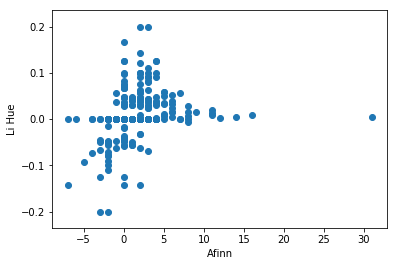

In [203]:
plt.scatter(afinn_sentences,polarity_sentences)
plt.xlabel('Afinn')
plt.ylabel('Li Hue');

** Rulebased **

In [205]:
from textblob import TextBlob
import nltk.sentiment
nltk.sentiment.util.EMOTICON_RE
#nltk.sentiment.util.HAPPY
#nltk.sentiment.util.SAD

re.compile(r"\n    (?:\n      [<>]?\n      [:;=8]                     # eyes\n      [\-o\*\']?                 # optional nose\n      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth\n      |\n      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth\n      [\-o\*\']?                 # optional nose\n      [:;=8]                     # eyes\n      [<>]?\n      |\n      <3                         # heart\n    )",
re.IGNORECASE|re.UNICODE|re.VERBOSE)

In [218]:
sentences = ['You are so beautiful, to me','You are very beautiful, on the inside','You are not beautiful']
print(sentiment_analyzer.polarity_scores(sentences[-1]))
b = TextBlob(sentences[-1])
print(b.sentiment)

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.4847}
Sentiment(polarity=-0.425, subjectivity=1.0)


In [214]:

textblob_sentences = [TextBlob(sentence).sentiment.polarity for sentence in sample_sentences]

sentiment_analyzer = nltk.sentiment.SentimentIntensityAnalyzer() # vader sentiment analyzer. Lexicon and rulebased.
vader_sentiment = [sentiment_analyzer.polarity_scores(sentence) for sentence in sample_sentences]
vader_sentiment = [sentiment['pos']-sentiment['neg'] for sentiment in vader_sentiment]


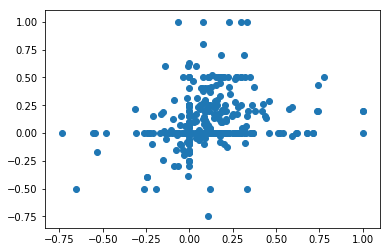

In [216]:
# Make an interactive plot or sample discord between the sentiment models. 
plt.scatter(vader_sentiment,textblob_sentences)


# Modelbased Information Extraction

<center> ** Lets bring in the big guns **<center>
![](https://www.rei.com/media/2a65e55e-8a10-4f8a-87b9-00445c53140f?size=1020x510)

The field of natural language processing (NLP) have developed models for parsing natural language extracting relations and entities.

Core tasks include: 
* 1)Tagging words by their part of speech (POS) to reveal the linguistic role they play in the sentence (e.g., Verb, Noun, Adjective, etc.);
* 2) tagging words as named entities (NER) such as places or organizations; 
* 3) structuring or "parsing" sentences into nested phrases that are local to, describe or depend on one another; and 
* 4) extracting informational claims from those phrases, like the Subject-Verb-Object (SVO)

NLTK can do this, however not with state-of-the-art results. So here we tap into other ressources especially the CoreNLP framework developed at Stanford by Christopher Manning and others.

# Named Entity Recognition (NER)
To continue our example about extracting names, we can now compare it to state of the art methods for extracting entities. 

Important to note here, is that: we are way beyond Regular expressions. 

These are supervised models, trained to recognize entities, from position in sentence, and semantic knowledge about words built into latent representations.

In [143]:
## STANFORDS IMPLEMENTATION
stanford_entities = stanford.nerTagger.tag(nltk.word_tokenize(string_sample[0:10000]))
## SPACYs implementation
import spacy
nlp = spacy.load('en')
enron_processed_spacy = nlp(string_sample[0:10000])
spacy_entities = enron_processed_spacy.ents
len([ent for ent in stanford_entities if ent[1]!='O']),len(spacy_entities)

(254, 284)

In [66]:

[ent for ent in stanford_entities if ent[1]!='O']


[('--', 'PERSON'),
 ('Sally', 'PERSON'),
 ('Marshall', 'PERSON'),
 ('Lucy', 'PERSON'),
 ('Miller', 'PERSON'),
 ('Leff', 'PERSON'),
 ('Dan', 'PERSON'),
 ('Hickerson', 'PERSON'),
 ('Gary', 'PERSON'),
 ('Malcolm', 'PERSON'),
 ('Rodney', 'PERSON'),
 ('Hughes', 'ORGANIZATION'),
 ('James', 'PERSON'),
 ('A.', 'PERSON'),
 ('Dimichele', 'PERSON'),
 ('Rich', 'PERSON'),
 ('Causey', 'PERSON'),
 ('Richard', 'PERSON'),
 ('Hermann', 'PERSON'),
 ('Robert', 'PERSON'),
 ('Rick', 'PERSON'),
 ('Beck', 'PERSON'),
 ('Sally', 'PERSON'),
 ('Haedicke', 'PERSON'),
 ('Mark', 'PERSON'),
 ('E.', 'PERSON'),
 ('Hayslett', 'PERSON'),
 ('Rod', 'PERSON'),
 ('Shaw', 'PERSON'),
 ('Eric', 'PERSON'),
 ('Collins', 'PERSON'),
 ('Angie', 'PERSON'),
 ('Hinojosa', 'PERSON'),
 ('Esmeralda', 'PERSON'),
 ('Zoch', 'PERSON'),
 ('Judy', 'PERSON'),
 ('Elbertson', 'PERSON'),
 ('Janette', 'PERSON'),
 ('Valdez', 'LOCATION'),
 ('Christina', 'PERSON'),
 ('Heathman', 'PERSON'),
 ('Karen', 'PERSON'),
 ('K.', 'PERSON'),
 ('Westbrook', 'PERSON

## These entities serves as important merge points for further analysis.
e.g. geographical as we spoke about earlier.

In [ ]:
import geopy # install the geopy module: pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
Counter([ent.label_ for ent in spacy_entities])
for ent in spacy_entities:
    if ent.label_=='GPE':
        geocoded = geolocator.geocode(ent)
        print(ent,geocoded,geocoded.latitude,geocoded.longitude)
        
        break

But also people and organizations.

In [58]:
persons_spacy = set()
for ent in spacy_entities:
    if ent.label_=='PERSON':
        persons_spacy.add(str(ent))


In [59]:
persons_stanford = set([ent[0] for ent in stanford_entities if ent[1]=='PERSON'])
len(persons_stanford),len(persons_spacy),len(persons_stanford&persons_spacy)

(54, 34, 16)

In [68]:
#persons_stanford&persons_spacy
#persons_stanford

# Part-of-Speech (POS) tagging
POS-tagging is about classifing the semantic role of each word in a sentence. 
The Stanford POS tagger uses the [Penn Treebank tag set]('http://repository.upenn.edu/cgi/viewcontent.cgi?article=1603&context=cis_reports') to POS tag words from input sentences. 

|#. |Tag |Description |
|---|----|------------|
|1.     |CC     |Coordinating conjunction
|2.     |CD     |Cardinal number
|3.     |DT     |Determiner
|4.     |EX     |Existential there
|5.     |FW     |Foreign word
|6.     |IN     |Preposition or subordinating conjunction
|7.     |JJ     |Adjective
|8.     |JJR|   Adjective, comparative
|9.     |JJS|   Adjective, superlative
|10.|   LS      |List item marker
|11.|   MD      |Modal
|12.|   NN      |Noun, singular or mass
|13.|   NNS     |Noun, plural
|14.|   NNP     |Proper noun, singular
|15.|   NNPS|   Proper noun, plural
|16.|   PDT     |Predeterminer
|17.|   POS     |Possessive ending
|18.|   PRP     |Personal pronoun
|19.|   PRP\$|  Possessive pronoun
|20.|   RB      |Adverb
|21.|   RBR     |Adverb, comparative
|22.|   RBS     |Adverb, superlative
|23.|   RP      |Particle
|24.|   SYM     |Symbol
|25.|   TO      |to
|26.|   UH      |Interjection
|27.|   VB      |Verb, base form
|28.|   VBD     |Verb, past tense
|29.|   VBG     |Verb, gerund or present participle
|30.|   VBN     |Verb, past participle
|31.|   VBP     |Verb, non-3rd person singular present
|32.|   VBZ     |Verb, 3rd person singular present
|33.|   WDT     |Wh-determiner
|34.|   WP      |Wh-pronoun
|35.|   WP$     |Possessive wh-pronoun
|36.|   WRB     |Wh-adverb


In [67]:
text = ['I saw the elephant in my pajamas.', 'The quick brown fox jumped over the lazy dog.', 'While in France, Christine Lagarde discussed short-term stimulus efforts in a recent interview with the Wall Street Journal.', 'Trayvon Benjamin Martin was an African American from Miami Gardens, Florida, who, at 17 years old, was fatally shot by George Zimmerman, a neighborhood watch volunteer, in Sanford, Florida.', 'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo']
tokenized_text = [nltk.word_tokenize(t) for t in text]
pos_sents = stanford.postTagger.tag_sents(tokenized_text)
print(pos_sents)

[[('I', 'PRP'), ('saw', 'VBD'), ('the', 'DT'), ('elephant', 'NN'), ('in', 'IN'), ('my', 'PRP$'), ('pajamas', 'NNS'), ('.', '.')], [('The', 'DT'), ('quick', 'JJ'), ('brown', 'JJ'), ('fox', 'NN'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')], [('While', 'IN'), ('in', 'IN'), ('France', 'NNP'), (',', ','), ('Christine', 'NNP'), ('Lagarde', 'NNP'), ('discussed', 'VBD'), ('short-term', 'JJ'), ('stimulus', 'NN'), ('efforts', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('recent', 'JJ'), ('interview', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Wall', 'NNP'), ('Street', 'NNP'), ('Journal', 'NNP'), ('.', '.')], [('Trayvon', 'NNP'), ('Benjamin', 'NNP'), ('Martin', 'NNP'), ('was', 'VBD'), ('an', 'DT'), ('African', 'NNP'), ('American', 'NNP'), ('from', 'IN'), ('Miami', 'NNP'), ('Gardens', 'NNP'), (',', ','), ('Florida', 'NNP'), (',', ','), ('who', 'WP'), (',', ','), ('at', 'IN'), ('17', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('was', 'VBD'), ('fatally'

In [ ]:
# Under these conditions it might work reasonably well.

In [132]:
# lets see what the different persons are doing and saying.
pos_tags = stanford.postTagger.tag_sents([nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(string_sample[0:25000])])

In [ ]:
# other pos-taggers
nltk.pos_tag()
b = TextBlob(' '.join(enron_df.iloc[0:10].content))
b.tags
for token in enron_processed_spacy[0:10]:
    print(token.text,token.ent_type,token.ent_type_)


In [134]:
verbs = set(['VB','VBD','VBN','VBG'])
def get_person2kind(word_classes,skips_allowed=3):
    person2kind = {}
    for sentence in pos_tags:
        active = False
        for word,kind in sentence:
            if word in persons_stanford:
                if active and skip==0:
                    person+=(' '+word)
                    continue
                active = True
                skip = 0
                person = word
                continue
            elif active:
                if kind in word_classes:
                    if person in person2kind:
                        person2kind[person].append(word)
                    else:
                        person2kind[person] = [word]
                    active = False
                skip+=1
                if skip>skips_allowed:
                    active = False
    return person2kind
get_person2kind(verbs)

{'--': ['settle', 'changing', 'build', 'been'],
 '-- -- -- -- -- -- -- -- -- -- --': ['Forwarded', 'Forwarded', 'Forwarded'],
 'Davis': ['following', 'said', 'began', 'had', 'was', 'kicked', 'resolving'],
 'Robert': ['Buy'],
 'Shaw': ['took']}

While the Core objective in NLP, and AI research more specifically, is to develop generic models, that can handle almost any situation. 

However one should remember that they were trained on specific samples and datasets. While they might be highly effective under certain conditions, others might yield them useless.

# Subject-Verb-Object


In [505]:
ieDF = stanford.openIE(s)


In [182]:
ieDF#.object#.apply(lambda x: x.split('/')[:-1:2])


,certainty,subject,verb,object
0,0.518918,any/dti irregularities/nns,took/vbd,place/nn
1,1.000000,The/at Fulton/np-tl County/nn-tl Grand/jj-tl J...,has,np $ recent/jj primary/nn election/nn produced...
2,1.000000,The/at September-October/np term/nn jury/nn ha...,of/in,possible/jj irregularities/nns
3,1.000000,The/at September-October/np term/nn jury/nn ha...,of/in,possible/jj irregularities/nns
4,1.000000,The/at September-October/np term/nn jury/nn ha...,of/in,irregularities/nns
5,1.000000,The/at September-October/np term/nn jury/nn ha...,of/in,irregularities/nns
6,1.000000,did/dod find/vb,that/cs,many/ap of/in Georgia 's np $ registration/nn ...
7,1.000000,many/ap of/in Georgia,has,np $ registration/nn and/cc election/nn laws/n...
8,1.000000,did/dod find/vb,that/cs,many/ap of/in Georgia 's np and/cc election/nn...
9,1.000000,did/dod find/vb,that/cs,many/ap of/in Georgia 's np and/cc laws/nns ar...


In [206]:
pos_sample = stanford.postTagger.tag_sents([nltk.word_tokenize(sentence) for sentence in nltk.sent_tokenize(enron_sample[0:20000])])


In [213]:
NTarget = 'JJ'
#Word = ''
NResults = set()

for sentence in pos_sample:
    adj = False
    for ent,kind in sentence:
        if kind=='JJ':
            adj = ent
            continue
        if adj:
            if kind=='NN':
                NResults.add((adj,ent))
                adj=False
            if kind=='.': # sentence ended
                adj = False

In [214]:
NResults

{('11th', 'Time'),
 ('12-month', 'lease'),
 ('12-month', 'term'),
 ('Approximate', 'delta'),
 ('Customized', 'position'),
 ('above', 'project'),
 ('active', 'password'),
 ('additional', 'call'),
 ('annual/seasonal', 'supply'),
 ('appropriate', 'entity'),
 ('appropriate', 'folder'),
 ('bottom', 'grid'),
 ('changed', 'position'),
 ('collar/floor', 'price'),
 ('complete', 'list'),
 ('consolidated', 'position'),
 ('corresponding', 'term'),
 ('current', 'position'),
 ('difficult', 'time'),
 ('economic', 'impact'),
 ('electric', 'period'),
 ('entire', 'unit'),
 ('explicit', 'position'),
 ('fine', 'PM'),
 ('first', 'bullet'),
 ('fixed', 'kWh'),
 ('flexible', 'position'),
 ('formal', 'business'),
 ('forward', 'gas'),
 ('good', 'CPA'),
 ('good', 'communication'),
 ('high', 'level'),
 ('honest', 'trip'),
 ('individual', 'position'),
 ('individual', 'room'),
 ('informative', 'solution'),
 ('initial', 'set'),
 ('instantaneous', 'gamma'),
 ('interruptible', ')'),
 ('large', 'number'),
 ('likely', '

In [ ]:

import re
pattern = 'million|billion'

spans = []
for val in re.finditer(pattern,sample):
    spans.append(val.span())
number_words = set(['million','billion','thousands','trillion'])
for sentence in nltk.sent_tokenize(sample):
    tokenized_sentence = nltk.word_tokenize(sentence)
    for num,word in enumerate(tokenized_sentence):
        if word in number_words:
            print(tokenized_sentence[num-1],word,tokenized_sentence[num+1])



In [176]:
sample = ' '.join(enron_df.sample(10).content.values)
pattern = '[A-Z][a-z]+\,'
explore_regex(pattern,sample)
name_regex = re.compile(r" ([A-Z]\w+)(?= ([A-Z]\w*))?([\'s])?")
#name_pattern = '(([A-Z]{1}[a-z]+)( )*(?[A-Z]{1}[a-z]+))'
names = []
for sentence in nltk.sent_tokenize(' '.join(enron_df.sample(10).content.values)):
    for subsentence in sentence.split('\n'):
        results = name_regex.findall(subsentence.strip()[1:])
        if len(results)!=0:
        #if results!=None:
            names.append((results,subsentence))

names

[([('Federal', '', '')],
  'Delete if you are an international student or a domestic student not interested in Federal financial aid.'),
 ([('Federal', '', ''),
   ('July', '', ''),
   ('Treasury', '', ''),
   ('May', '', '')],
  'The interest rates on Federal education loans are variable and change on July 1, based on the 91-day T-Bill rate from the last Treasury auction in May plus a statutory percentage add-on (1.7% in-school, 2.3% in repayment).'),
 ([('May', '', '')],
  'That auction was on May 29, 2001, with a rate of 3.688%, which rounds to 3.69%.'),
 ([('July', '', ''),
   ('In', '', ''),
   ('Rate', 'Repayment', ''),
   ('Repayment', 'Rate', ''),
   ('Rate', 'Direct', ''),
   ('Direct', 'Loans', ''),
   ('Loans', '', ''),
   ('Thus', '', '')],
  'According to the formula, the new applicable interest rates are as follows effective July 1: In-School Rate Repayment Rate Direct Loans 5.39% 5.99% Thus, interest rates have dropped by 2.2% and are lower than they have been in many ye

In [269]:
zipcode_pattern = '([^0-9[.\,\w]*)?([0-9]{5})(-[0-9]{4})?'
zipcode_pattern = '([A-Z]+\w+, [A-Z]{2} [0-9]{5}(-[0-9]{4})?)'
for result in re.finditer(zipcode_pattern,sample):
    start,stop = result.span()
    print(result.groups(),sample[start-50:stop+20])

('Albuquerque, NM 87113', None) ll Power Systems, Inc. > 8725 Pan American Frwy > Albuquerque, NM 87113 > 505-798-6424 > 50
('Station, TX 77845', None) t 28th. I mailed it to 4303 Pate Rd. #29, College Station, TX 77845. I will go ahead an
('Houston, TX 77024', None) resses for DSL lines: Hunter Shively 10545 Gawain Houston, TX 77024 713 461-4130 Philli
('Houston, TX 77055', None) X 77024 713 461-4130 Phillip Allen 8855 Merlin Ct Houston, TX 77055 713 463-8626 Mike G
('Houston, TX 77057', None)  77055 713 463-8626 Mike Grigsby 6201 Meadow Lake Houston, TX 77057 713 780-1022 Thanks
('McLean, VA 22102-3303', '-3303') CN Power, Inc. 7926 Jones Branch Drive, Suite 630 McLean, VA 22102-3303 Phone (703)893-4330
('McLean, VA 22102-3303', '-3303') CN Power, Inc. 7926 Jones Branch Drive, Suite 630 McLean, VA 22102-3303 Phone (703)893-4330
('Austin, TX 78761-5427', '-5427') surance Agency, Inc 6000 N., Lamar P.O. Box 15427 Austin, TX 78761-5427 Policy #CBI420478 C
('Sterling, VA 20164', None) el

In [273]:
# tlf numbers.
phone_regex = '(\(?\d{3}[\- \)]*\d{3}[\- ]*\d{4})'
re.findall(phone_regex,sample)

['505-798-6424',
 '505-798-6050',
 '505-220-4129',
 '713-853-7107',
 '303-575-6490',
 '512-338-1119',
 '512-338-1110',
 '512-748-7495',
 '512-338-1103',
 '512-338-1119',
 '512-338-1110',
 '512-748-7495',
 '512-338-1103',
 '512-338-1119',
 '512-338-1110',
 '512-748-7495',
 '512-338-1103',
 '713-942-8436',
 '713-853-3304',
 '858-450-2554',
 '713-853-1411',
 '(713)853-7041',
 '713-853-5536',
 '0000000000',
 '0000000000',
 '713 646 2391',
 '251327 1595',
 '265229 1063',
 '713 461-4130',
 '713 463-8626',
 '713 780-1022',
 '713-853-7041',
 '(403) 974-6756',
 '(403) 974-6756',
 '713-853-7041',
 '713-853-1711',
 '713-646-3239',
 '(212) 686-6808',
 '(703)893-4330',
 '(703)893-4390',
 '(443)255-7699',
 '713-853-1803',
 '(703)893-4330',
 '(703)893-4390',
 '(443)255-7699',
 '713-853-1803',
 '713-853-1803',
 '888-271-0949',
 '(713) 853-9510',
 '(713) 853-9510',
 '888-271-0949',
 '713-853-1411',
 '713-853-7041',
 '713-853-1711',
 '(512)451-6551',
 '(503-464-8671',
 '(713) 853-7041',
 '(203) 355-5059

# Danish ressources:
* A very nice overview of Danish nlp ressources: http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6956/pdf/imm6956.pdf
* The `polyglot module` (although hard to install) has support for danish among many other languages.